# Ford GoBike System-Data Exploration
## by Shilpa Madini

## Preliminary Wrangling

> This document explores dataset for the Bay Wheels trip data. After my initial assessment of  data sets for the years 2018, 2019 and 2020, I have chosen to use data set for year 2017 becuase of it completeness and consistency of variables captured across all months of the year.  There is only one file available for the year 2017 and I downloaded it  from [Bay Wheels  System Data](https://www.lyft.com/bikes/bay-wheels/system-data)


In [485]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

In [583]:
# load in the dataset into a pandas dataframe
bikedata_orig = pd.read_csv('data/2017-fordgobike-tripdata.csv')

# Assess

### Visual Assessment

In [584]:
bikedata_orig.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [585]:
bikedata_orig.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber
519699,188,2017-06-28 09:49:46.3770,2017-06-28 09:52:55.3380,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber


In [586]:
bikedata_orig.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
398705,265,2017-08-29 12:50:58.8910,2017-08-29 12:55:24.2740,77,11th St at Natoma St,37.773507,-122.416040,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,292,Subscriber
242049,708,2017-10-15 12:21:45.6720,2017-10-15 12:33:34.4490,112,Harrison St at 17th St,37.763847,-122.413004,109,17th St at Valencia St,37.763316,-122.421904,2364,Customer
416989,759,2017-08-23 07:45:57.1510,2017-08-23 07:58:36.8320,129,Harrison St at 20th St,37.758862,-122.412544,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,953,Subscriber
5647,376,2017-12-28 14:10:59.0760,2017-12-28 14:17:15.0990,297,Locust St at Grant St,37.322980,-121.887931,316,San Salvador St at 1st St,37.330165,-121.885831,1913,Subscriber
195570,1496,2017-10-27 17:00:32.8230,2017-10-27 17:25:28.8490,119,18th St at Noe St,37.761047,-122.432642,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2555,Subscriber


> Upon just visual assessment looks like there are no null values
### Programmatic Assessment

In [587]:
bikedata_orig.shape

(519700, 13)

>  we have 519700 observations and 13 features

In [588]:
bikedata_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


>  1. start_time , end_time columns are not timestamp data type
>  2. No null values at all

In [589]:
bikedata_orig[bikedata_orig.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type


>  No duplicate records

In [590]:
bikedata_orig['bike_id'].nunique()

3673

In [591]:
bikedata_orig[bikedata_orig.bike_id.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
33,781,2017-12-31 23:33:52.9810,2017-12-31 23:46:54.9720,251,California St at University Ave,37.870555,-122.279720,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer
49,782,2017-12-31 23:15:25.7580,2017-12-31 23:28:28.3720,6,The Embarcadero at Sansome St,37.804770,-122.403234,6,The Embarcadero at Sansome St,37.804770,-122.403234,1691,Customer
50,799,2017-12-31 23:15:08.3850,2017-12-31 23:28:28.2040,6,The Embarcadero at Sansome St,37.804770,-122.403234,6,The Embarcadero at Sansome St,37.804770,-122.403234,533,Customer
51,575,2017-12-31 23:17:57.8670,2017-12-31 23:27:32.8800,6,The Embarcadero at Sansome St,37.804770,-122.403234,6,The Embarcadero at Sansome St,37.804770,-122.403234,1568,Customer
67,1817,2017-12-31 22:25:51.3540,2017-12-31 22:56:08.8780,49,S Park St at 3rd St,37.780760,-122.394989,6,The Embarcadero at Sansome St,37.804770,-122.403234,1691,Customer
68,1867,2017-12-31 22:24:35.8930,2017-12-31 22:55:43.5650,49,S Park St at 3rd St,37.780760,-122.394989,6,The Embarcadero at Sansome St,37.804770,-122.403234,533,Customer
84,931,2017-12-31 22:17:43.0900,2017-12-31 22:33:15.0480,66,3rd St at Townsend St,37.778742,-122.392741,23,The Embarcadero at Steuart St,37.791464,-122.391034,1898,Customer
87,1300,2017-12-31 22:05:51.7000,2017-12-31 22:27:31.7510,28,The Embarcadero at Bryant St,37.787168,-122.388098,6,The Embarcadero at Sansome St,37.804770,-122.403234,1568,Customer
88,1310,2017-12-31 22:05:31.7570,2017-12-31 22:27:21.8680,28,The Embarcadero at Bryant St,37.787168,-122.388098,6,The Embarcadero at Sansome St,37.804770,-122.403234,2537,Customer
90,1299,2017-12-31 22:05:28.4080,2017-12-31 22:27:08.0220,28,The Embarcadero at Bryant St,37.787168,-122.388098,6,The Embarcadero at Sansome St,37.804770,-122.403234,2941,Customer


>  Let's look at some records for bike_id 3539

In [592]:
bikedata_orig.query('bike_id == 3539')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer
33,781,2017-12-31 23:33:52.9810,2017-12-31 23:46:54.9720,251,California St at University Ave,37.870555,-122.279720,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer
1193,709,2017-12-31 10:59:52.1560,2017-12-31 11:11:41.9360,248,Telegraph Ave at Ashby Ave,37.855956,-122.259795,251,California St at University Ave,37.870555,-122.279720,3539,Subscriber
1337,1224,2017-12-31 08:46:11.1300,2017-12-31 09:06:35.1600,195,Bay Pl at Vernon St,37.812314,-122.260779,248,Telegraph Ave at Ashby Ave,37.855956,-122.259795,3539,Subscriber


> These are different trips for the same bike, and bike_id is the unique identifier for a bike

In [593]:
bikedata_orig['user_type'].nunique()

2

In [594]:
bikedata_orig['user_type'].value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

> user_type is a categorical variable with two values 'subscriber' and 'customer'

In [595]:
bikedata_orig['start_station_name'].value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)                 15187
The Embarcadero at Sansome St                                      13664
San Francisco Caltrain (Townsend St at 4th St)                     12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)          12055
Market St at 10th St                                               11960
Montgomery St BART Station (Market St at 2nd St)                   11334
Berry St at 4th St                                                 10956
Powell St BART Station (Market St at 4th St)                       10142
Howard St at Beale St                                               9926
Steuart St at Market St                                             9347
Powell St BART Station (Market St at 5th St)                        7987
Embarcadero BART Station (Beale St at Market St)                    7649
2nd St at Townsend St - Coming Soon                                 6605
3rd St at Townsend St                              

In [596]:
bikedata_orig['end_station_name'].value_counts()

San Francisco Caltrain (Townsend St at 4th St)                     17378
San Francisco Ferry Building (Harry Bridges Plaza)                 17109
The Embarcadero at Sansome St                                      16531
San Francisco Caltrain Station 2  (Townsend St at 4th St)          13658
Montgomery St BART Station (Market St at 2nd St)                   13443
Market St at 10th St                                               11298
Powell St BART Station (Market St at 4th St)                       11064
Berry St at 4th St                                                 10611
Steuart St at Market St                                             9321
Powell St BART Station (Market St at 5th St)                        8563
Howard St at Beale St                                               7791
2nd St at Townsend St - Coming Soon                                 7277
Townsend St at 7th St                                               6681
Embarcadero BART Station (Beale St at Market St)   

>  Looks like majority of the trips are originated at San Francisco Ferry Building (Harry Bridges Plaza). Interestingly there are some station that do not have significant number of trips.

In [597]:
bikedata_orig['duration_sec'].sample(5)

499121    436
451822    387
279226    908
24857     396
228335    602
Name: duration_sec, dtype: int64

## Quality
> 1. convert start_time and end_time columns to timestamp data type

### Tidiness 

>  1.Create month, weekday from start_time column
>  2.Create a new column duration_mins  from duration_sec column


## Clean

> Convert start_time and end_time columns to timestamp data type

In [598]:
# Create a copy of theorigina data frame and perform cleaning operations on the copy
# we do not want to loose the original data set
bikedata_clean = bikedata_orig.copy()

In [599]:
bikedata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [600]:
bikedata_clean.start_time = pd.to_datetime(bikedata_clean.start_time,infer_datetime_format=True)
bikedata_clean.end_time = pd.to_datetime(bikedata_clean.end_time,infer_datetime_format=True)

In [601]:
bikedata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: datetime64[ns](2), float64(4), int64(4), object(3)
memory usage: 51.5+ MB


> Create month, weekday from start_time column


In [602]:
bikedata_clean['month'] = bikedata_clean['start_time'].dt.strftime('%b')
bikedata_clean['weekday'] = bikedata_clean['start_time'].dt.weekday_name

In [603]:
bikedata_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,weekday
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Dec,Sunday
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Dec,Sunday
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,Dec,Sunday
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,Dec,Sunday
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,Dec,Sunday


In [604]:
bikedata_clean['month'].value_counts()

Oct    108937
Sep     98558
Nov     95612
Dec     86539
Aug     83292
Jul     44073
Jun      2689
Name: month, dtype: int64

>  Interesting observation is there are no records for the months of Jan, Feb, Mar, Apr and May
>  Highest number of rides recorded in the month of october

In [605]:
bikedata_clean['weekday'].value_counts()

Tuesday      87865
Wednesday    87752
Thursday     85243
Monday       81410
Friday       81165
Saturday     50874
Sunday       45391
Name: weekday, dtype: int64

>  Not much variation can be observed in the number of rides from monday to friday. Rides are significantly less on sunday understandably it is weekend.

> Calculate duration_min and duration_hr columns using duration_sec

In [606]:
bikedata_clean['duration_mins'] = bikedata_clean['duration_sec']/60

In [607]:
bikedata_clean['duration_mins'].sort_values(ascending = False).head(10)

138862    1439.483333
223508    1439.250000
54888     1438.750000
54889     1438.016667
120423    1437.533333
78414     1437.133333
427904    1436.650000
404193    1435.583333
392030    1434.583333
54034     1432.916667
Name: duration_mins, dtype: float64

> Looks like there are trips that are almost a day length in duration

### Store

In [608]:
# Store clean data to file
bikedata_clean.to_csv('data/bikedata_clean.csv', encoding='utf-8', index=False)

In [609]:
# now read the clean data set into pandas dataframe for further exploration
bikedata  = pd.read_csv('data/bikedata_clean.csv')
bikedata.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,weekday,duration_mins
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Dec,Sunday,1335.166667
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Dec,Sunday,1313.333333
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,Dec,Sunday,762.800000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,Dec,Sunday,1036.200000
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,Dec,Sunday,726.716667


In [611]:
# convert weekday , month into ordered categorical types

ordinal_var_dict = {'weekday' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                    'month' : ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']   
                   }
for var in ordinal_var_dict:
    bikedata[var] =  bikedata[var].astype('category', categories = ordinal_var_dict[var], ordered = True)

In [612]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 16 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
month                      519700 non-null category
weekday                    519700 non-null category
duration_mins              519700 non-null float64
dtypes: category(2), float64(5), int64(4), object(5)
memory usage: 56.5+ MB


### Structure of the dataset?

> There are 519700 observations with 13 features. 

### About The Data

#### Each trip is anonymized and includes:
> 1. Trip Duration (seconds)
> 2. Start Time and Date
> 3. End Time and Date
> 4. Start Station ID
> 5. Start Station Name
> 6. Start Station Latitude
> 7. Start Station Longitude
> 8. End Station ID
> 9. End Station Name
> 10. End Station Latitude
> 11. End Station Longitude
> 12. Bike ID
> 13. User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

#### Following features are engineered from the original dataset
> 14. month (month of the year,extracted from start time and Date)
> 15. weekday (day of the week, extracted from start time and Date)
> 16. duration-min (calculated using duration-sec, represents the duration in minutes)

### Main feature(s) of interest in the dataset?

> 1. When are most trips taken interms of day of the week, month of the year?
> 2. Top 10 station names where most trips are originated?
> 2. What is Average trip duration?
> 4. Significance of user type on the number of rides and average duration?


### Features in the dataset that may help support investigation into the feature(s) of interest?

> I am going to concentrate on the following features to help answers my questions
> 1. duration in mins - Quantitative continuous measurement type
> 2. start station Name - Categorical Nominal measurement type
> 3. user Type - Categorical Nominal measurement type
> 4. weekday - Categorical Nominal measurement type
> 5. month - Categorical Nominal measurement type
  

## Univariate Exploration

> This sections investigates distributions of individual variables. If
there are any unusual points or outliers, we will take a deeper look to clean things up
and prepare data to look at relationships between variables.

> every observation in the data set is a unique ride trip for a bike id

> I'll start by looking at the distribution of duration_mins to understand the average trip duration. Since this is a quantitative continuous measurement type, I will start by plotting a Histogram.

In [513]:
bikedata['duration_mins'].describe()

count    519700.000000
mean         18.316825
std          57.402441
min           1.016667
25%           6.366667
50%           9.933333
75%          15.633333
max        1439.483333
Name: duration_mins, dtype: float64

In [514]:
bikedata['duration_mins'].min(),bikedata['duration_mins'].max() 

(1.0166666666666666, 1439.4833333333333)

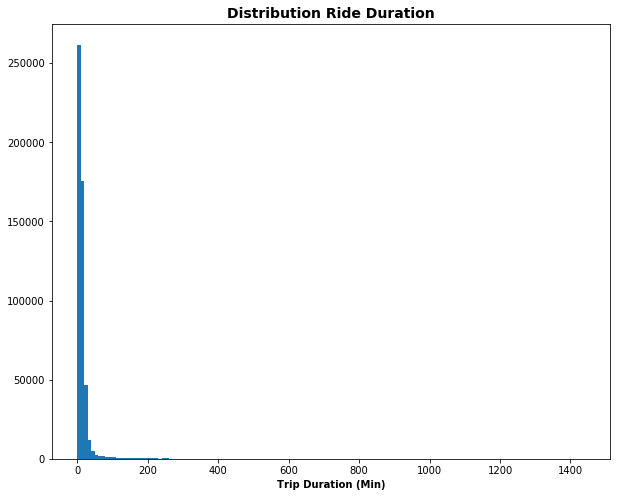

In [614]:
# start with a standard-scaled plot
binsize = 10
bins = np.arange(0, bikedata['duration_mins'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = bikedata, x = 'duration_mins', bins = bins)
# Add Labels
plt.title('Distribution Ride Duration'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('Trip Duration (Min)'.title(),fontsize = 10, weight = 'bold')
plt.show()

Most of the data is between 0 and 200min limit. There is a long tail in the distribution. Lets plot it on the log scale instead

In [517]:
log_data = np.log10(bikedata['duration_mins'])
log_data.min(), log_data.max()

(0.0071785846271233758, 3.1582066408825495)

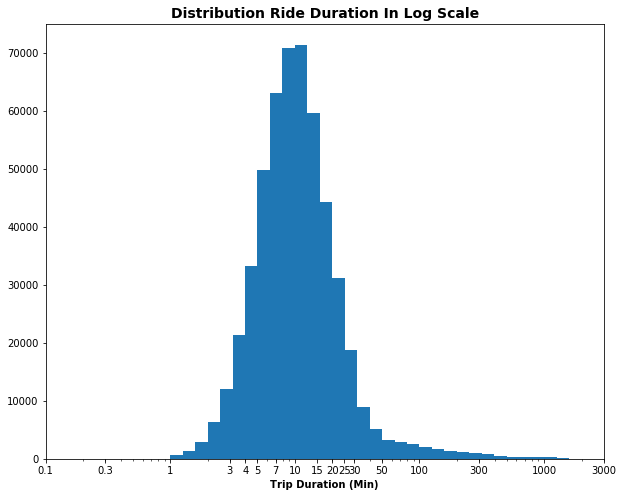

In [615]:
log_bin_size = 0.1
log_bins = 10 ** np.arange(0, np.log10(bikedata['duration_mins'].max())+log_bin_size, log_bin_size)
tick_locs = [0.1,0.3,1,3,4,5,7,10,15,20,25,30,50, 100, 300, 1000, 3000]
tick_labels = ['{}'.format(v) for v in tick_locs]

plt.figure(figsize = [10,8])
plt.hist(data = bikedata, x = 'duration_mins', bins = log_bins)
plt.xscale('log')
plt.xticks(tick_locs, tick_labels)
plt.title('Distribution Ride Duration in Log Scale'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('Trip Duration (Min)'.title(),fontsize = 10, weight = 'bold')
plt.show()

> Duration has a normal distribution with some point at the tail end of the left dragging the distribution to the left. Majority of the points are distributed between 3.5 and 25. This means majority of the rides have a duration lengh between 3.5 min to 20min. Some rides also have almost a day duration.

> Now I will move on to other categorical variables in the data set
> First up is user type

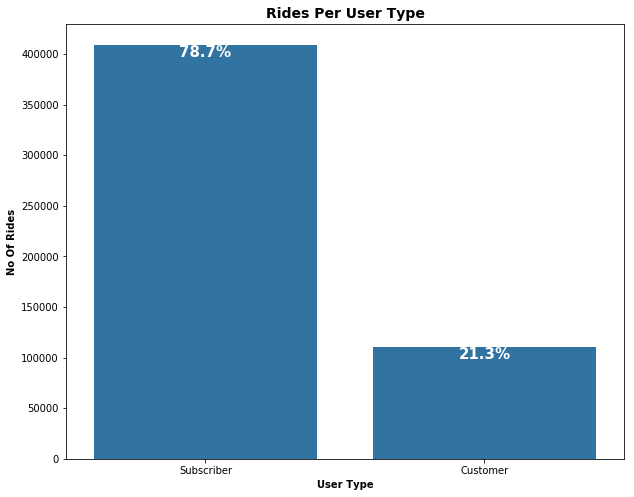

In [617]:
plt.figure(figsize = [10,8])

# create the plot
base_color = sb.color_palette()[0]
cat_order = bikedata['user_type'].value_counts().index
sb.countplot(data = bikedata, x = 'user_type', color = base_color, order = cat_order);

# add labels
plt.title('Rides Per User Type'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('User Type'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('No of Rides'.title(),fontsize = 10, weight = 'bold');


# add annotations
n_points = bikedata.shape[0]
cat_counts = bikedata['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations

# loop through each pait of locations and labels
for loc , label in zip(locs, labels):
    
    # get the text property for the label
    
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', va='top', color = 'w', weight = 'heavy', fontsize = 15)


> Subscribers tend use the bike more often than occasional customers

> Now let's take a look at trips data for weekday and month

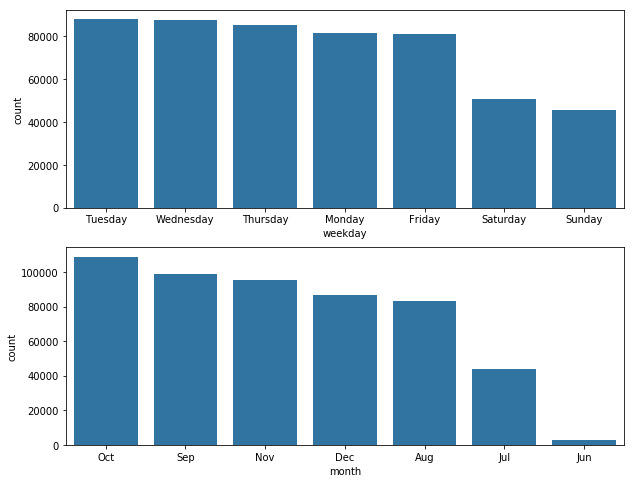

In [520]:
# let's plot two categories  together to get an idea of each  variable's distribution.

fig, ax = plt.subplots(nrows=2, figsize = [10,8])
day_order = bikedata['weekday'].value_counts().index
month_order = bikedata['month'].value_counts().index
default_color = sb.color_palette()[0]
sb.countplot(data = bikedata, x = 'weekday', color = default_color, order = day_order,ax = ax[0])
sb.countplot(data = bikedata, x = 'month', color = default_color,order = month_order, ax = ax[1])

plt.show()

> Weekdays have most number of rides compared to weekends. 

> Interestingly Jun has very less ridership. We are also missing data set for six months of the year Jan to May. This may not be enough data to determine the most ridership month of the year.

> Let us take a look at the distribution of data for starting stations and ending stations

In [521]:
bikedata['start_station_name'].nunique()

272

In [522]:
bikedata['end_station_name'].nunique()

272

> Since there are 272 stations we cannot possibly plot all 272 stations. Let's choose to plot top 10 stations
based on the number of rides

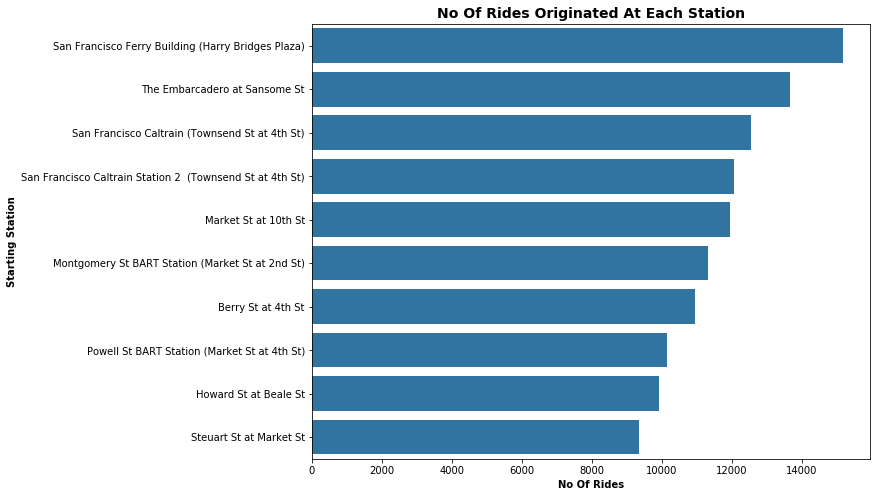

In [618]:
# plot for starting station
plt.figure(figsize = [10,8])
base_color = sb.color_palette()[0]
station_counts = bikedata['start_station_name'].value_counts().head(10);
sb.barplot(station_counts,station_counts.index.values, color = base_color);
plt.title('No of rides originated at each station'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('No of Rides'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('Starting Station'.title(),fontsize = 10, weight = 'bold');


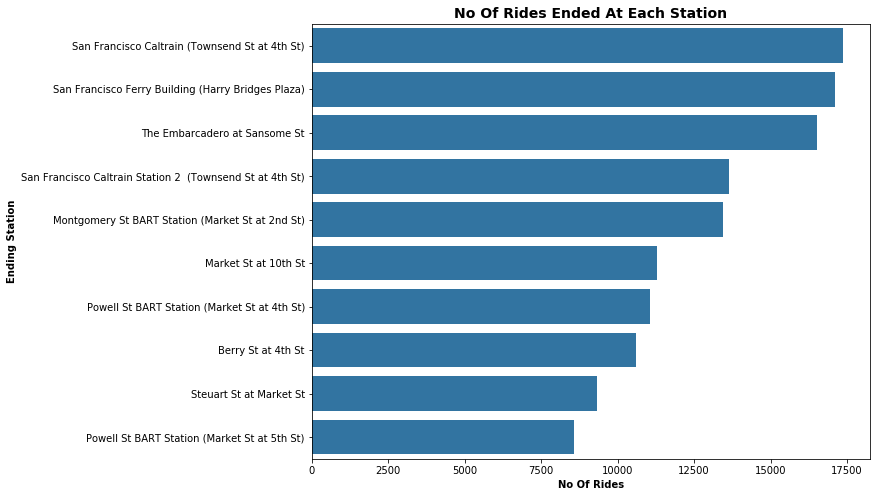

In [619]:
# plot for starting station
plt.figure(figsize = [10,8])
base_color = sb.color_palette()[0]
station_counts = bikedata['end_station_name'].value_counts().head(10);
sb.barplot( station_counts,station_counts.index.values, color = base_color);

# Add Labels
plt.title('No of rides ended at each station'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('No of Rides'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('Ending Station'.title(),fontsize = 10, weight = 'bold');

> Most Number of rides are originated at Sanfrancis Ferry Building ( Harry Bridges Plaza)
> Most of Number of rides ended at San Francisco Cal Train ( Townsend St at 4th St)

## Summary

> Duration took a large range of values.so I plotted the data using log scale transformation. After the log scale transformation data looked mostly normal unimodal with few outliers towards the left of the distribution. I did not remove these outliers as they are not largly affecting the over all distribution of the data.

> Subscribers have most number of rides

>  Weekdays have most number of rides

> While investigating data set for months I noticed very low number of records for the month of June.  Also data set is missing data for months Jan, Feb, Mar, April, May. Six months of data is missing in the dataset.

> we were able to find out look at at the Top 10 stations where the trips are originated

## Bivariate Exploration

> First let us look at the distribution of duration_mins againt weekday

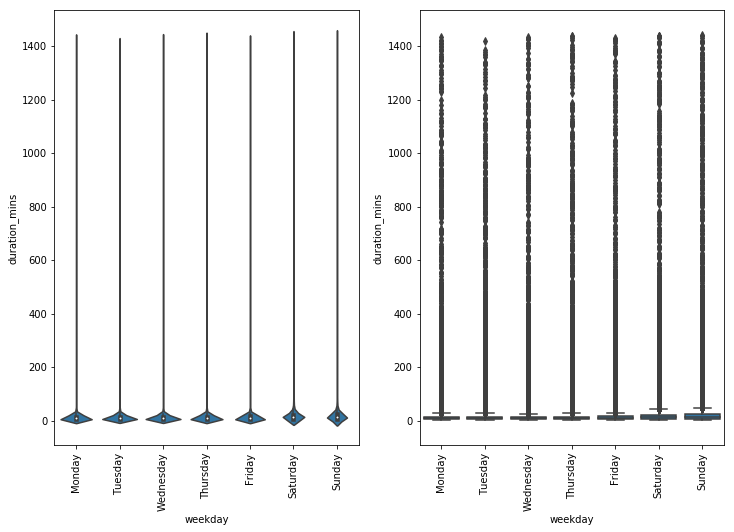

In [525]:
# Let's plot both violin and box plots 
plt.figure(figsize = [12,8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = bikedata, x = 'weekday', y = 'duration_mins', color = base_color)
plt.xticks(rotation = 90)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = bikedata, x = 'weekday', y = 'duration_mins', color = base_color)
plt.xticks(rotation = 90)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

> Looks like trip duration on any given weekday is mostly less than 50, with few extreme outliers with large values
> I want to plot the same plot by filtering out the records that are of duration_mins less than 50

In [526]:
bikedata_sub = bikedata.loc[bikedata['duration_mins'] < 50]

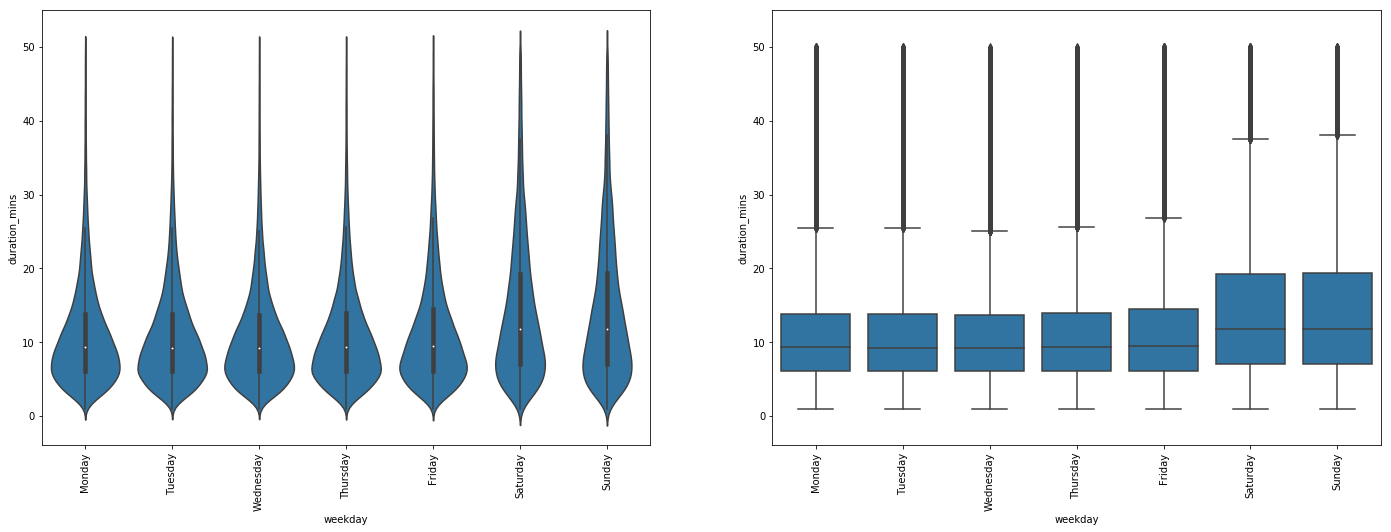

In [534]:
# Let's plot both violin and box plots with subset of data  
plt.figure(figsize = [24,8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = bikedata_sub, x = 'weekday', y = 'duration_mins', color = base_color)
plt.xticks(rotation = 90)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = bikedata_sub, x = 'weekday', y = 'duration_mins', color = base_color)
plt.xticks(rotation = 90)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

>  Trip duration is pretty much consistant on Mon to Friday but high on saturday and sunday. 

> Let's calulate the average duration and plot it against weekday

In [537]:
# get the average trip duration across all the rides
bikedata['duration_mins'].describe()

count    519700.000000
mean         18.316825
std          57.402441
min           1.016667
25%           6.366667
50%           9.933333
75%          15.633333
max        1439.483333
Name: duration_mins, dtype: float64

In [538]:
# group by the rides by weekday

bikedata_week = bikedata.groupby('weekday')
bikedata_week.duration_mins.mean()

weekday
Monday       16.135181
Tuesday      15.567019
Wednesday    15.294549
Thursday     16.259663
Friday       17.278022
Saturday     26.976056
Sunday       29.410955
Name: duration_mins, dtype: float64

> Average trip duration on weekdays ( Mon to Fri) is pretty much consistant and value ranges between 15mins to 17 mins
> Average trip duration on weekends ( Sat and Sun) ranges between 20 to 30 mins

> plot this below

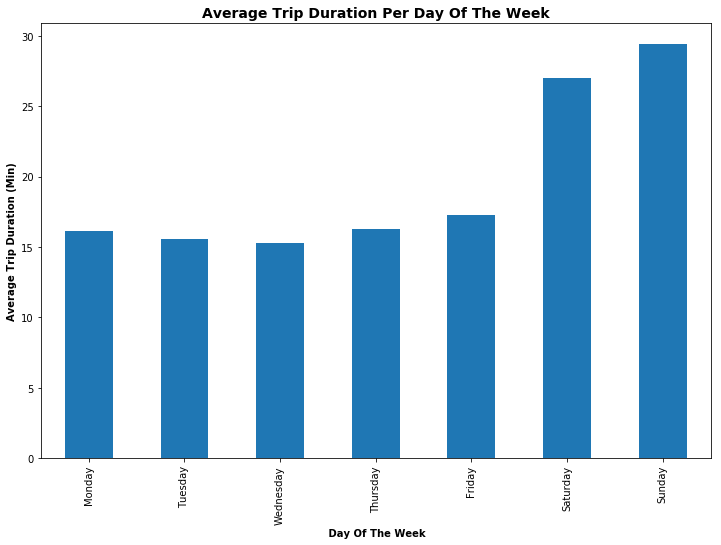

In [620]:
plt.figure(figsize = [12, 8])
base_color = sb.color_palette()[0]
bikedata_week.duration_mins.mean().plot(kind = 'bar', color = base_color);


# Add Labels
plt.title('Average Trip duration per day of the week'.title(),fontsize = 14, weight = 'bold')
plt.xlabel(' Day of the week'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('Average Trip Duration (min)'.title(),fontsize = 10, weight = 'bold');

> Plot clearly shows that Average trip duration is high on Saturday and Sunday.

> Let's plot the distribution of duration by month. This time I am only going to use box plot.

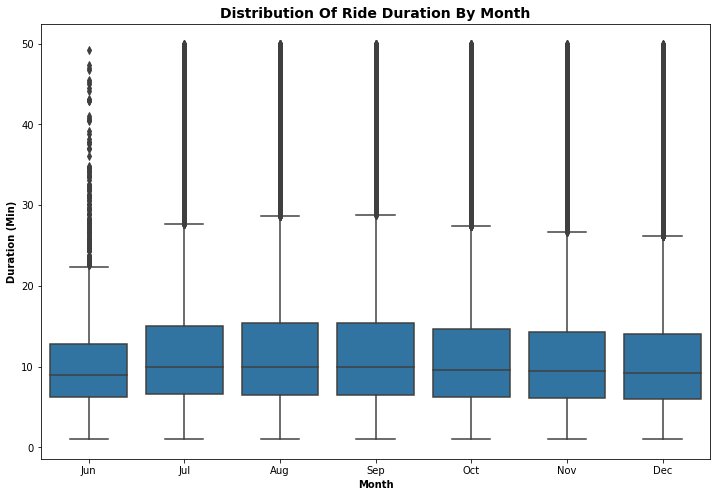

In [621]:
plt.figure(figsize = [12, 8])
base_color = sb.color_palette()[0]
sb.boxplot(data = bikedata_sub, x = 'month', y = 'duration_mins', color = base_color);

# Add Labels
plt.title('Distribution of Ride Duration by month'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('month'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('Duration (min)'.title(),fontsize = 10, weight = 'bold');

> Trip duration doesnt seem to vary much by month, it is slighlty less in June but the numer of rides in June are also less.

> Next take a look at the trip duration distribution by user type. I want to use violin plot for this

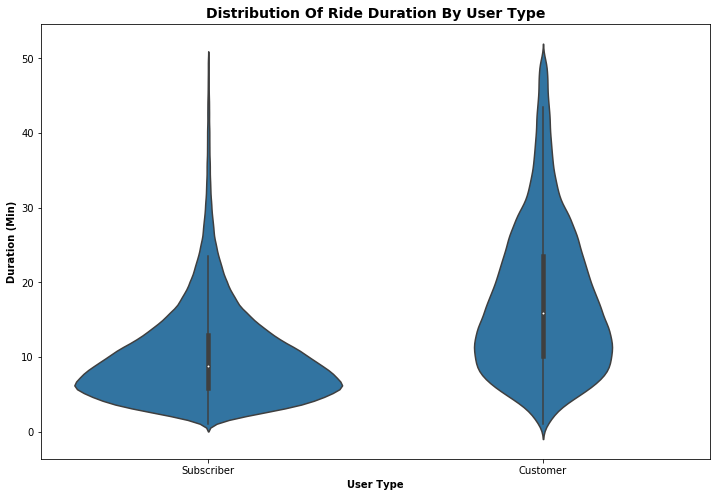

In [622]:
plt.figure(figsize = [12, 8])
base_color = sb.color_palette()[0]
sb.violinplot(data = bikedata_sub, x = 'user_type', y = 'duration_mins',color = base_color)

# Add Labels
plt.title('Distribution of Ride Duration by user type'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('user type'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('Duration (min)'.title(),fontsize = 10, weight = 'bold');

> Interesting observation is customers tend to have longer trip duraion that subscribers
> I want to plot a clustered bar to chart to observe the relationship between user_type and weekday

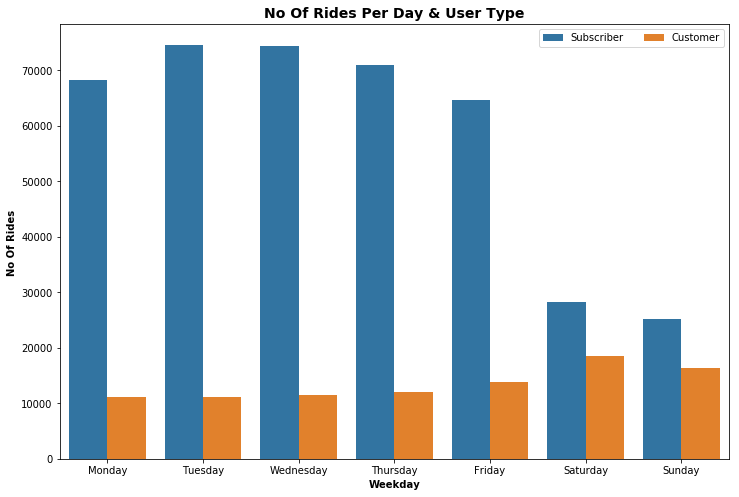

In [623]:
plt.figure(figsize = [12,8])
ax = sb.countplot(data = bikedata_sub, x = 'weekday', hue = 'user_type')
ax.legend(loc = 1 , ncol = 2)

# Add Labels
plt.title('No of Rides per day & user type'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('weekday'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('No of Rides '.title(),fontsize = 10, weight = 'bold');

> with this plot we can see that subscribers ride mostly on weekdays and customers mostly on weekends. Subscribers on weekdays record more number of rides

> Now let's take a look at average trip duration by grouping the data by user type

In [543]:
bikedata_user = bikedata.groupby('user_type')
bikedata_user.duration_mins.mean()

user_type
Customer      42.624096
Subscriber    11.755175
Name: duration_mins, dtype: float64

In [544]:
bikedata_user['duration_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,110470.0,42.624096,105.921861,1.016667,11.116667,18.100000,29.233333,1439.483333
Subscriber,409230.0,11.755175,30.876378,1.016667,5.833333,8.816667,13.033333,1434.583333


> Customers tend to take longer ride duration on average.

### Summary
> We looked the distribution of ride duration across the categorical variables user type, weekday and month.
> We were able to establish that average trip duraion is less on weekdays and high on weekends.
> and subscribers have most ridership than customers. Subscribers ride mostly on weekdays and customers ride mostly on weekends.
> We were also able to establish that customers tend to have high avergae trip duration and since they mostly ride on weekends we see average trip duration go high on weekends


## Multivariate Exploration

> Let us further analyse the significance of user type and day of the week on the number of rides taken and the average trip duration

> In this case we want to plot one numeric variable ( duration_mins ) and two categorical variables weekday and user type

> I want to use a Facet Grid plot for this plotting

/Users/shilpamadini/anaconda/envs/dand_py3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


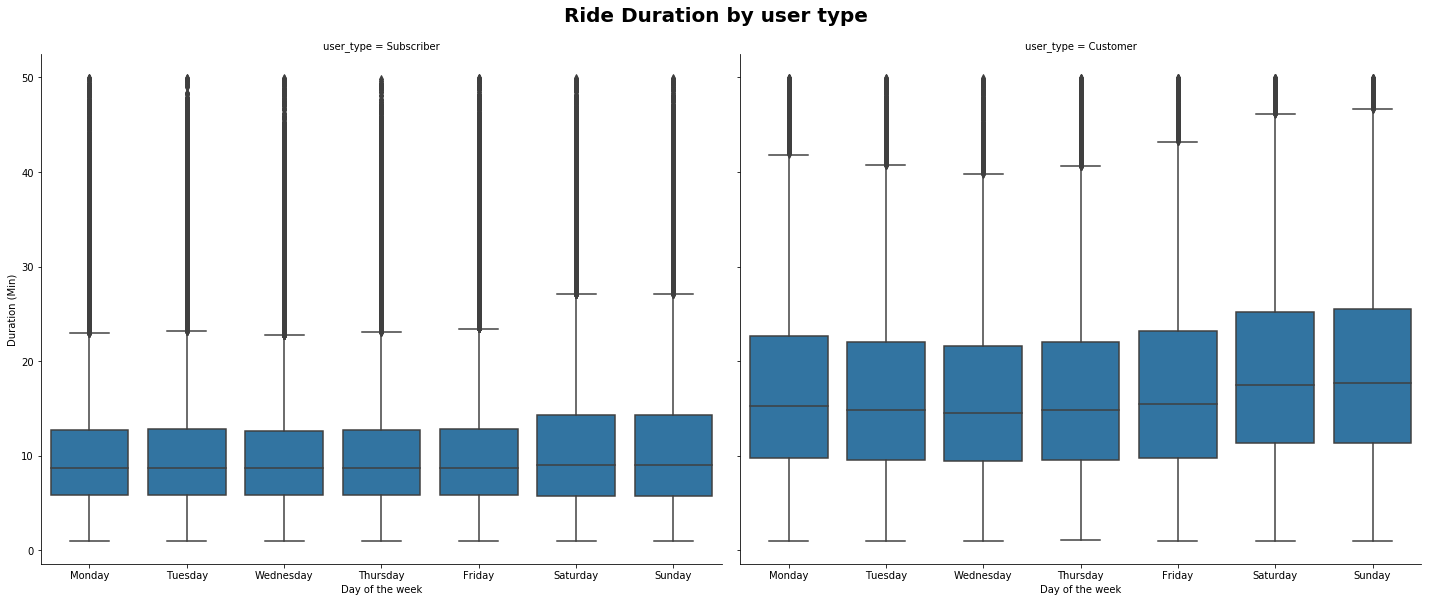

In [624]:
g = sb.FacetGrid(data = bikedata_sub, col = 'user_type', height = 8, aspect = (20/2)/8, margin_titles = True)
g.map(sb.boxplot, 'weekday', 'duration_mins')
plt.suptitle("Ride Duration by user type", y = 1.04, fontsize = 20, weight = 'bold');
g.set_axis_labels('Day of the week', 'Duration (Min)');

>  aggregate the data by user type and weekday

In [546]:
bikedata_user_day = bikedata.groupby(['user_type','weekday'])
bikedata_user_day.duration_mins.mean()

user_type   weekday  
Customer    Monday       41.814485
            Tuesday      39.144952
            Wednesday    38.327595
            Thursday     40.209360
            Friday       40.039432
            Saturday     44.581283
            Sunday       49.738875
Subscriber  Monday       11.341740
            Tuesday      11.569680
            Wednesday    11.314927
            Thursday     11.624314
            Friday       11.667631
            Saturday     13.318471
            Sunday       13.540184
Name: duration_mins, dtype: float64

> Let's plot a 2-d bar chart to plot of the mean of average trip duration by user type and weekday  

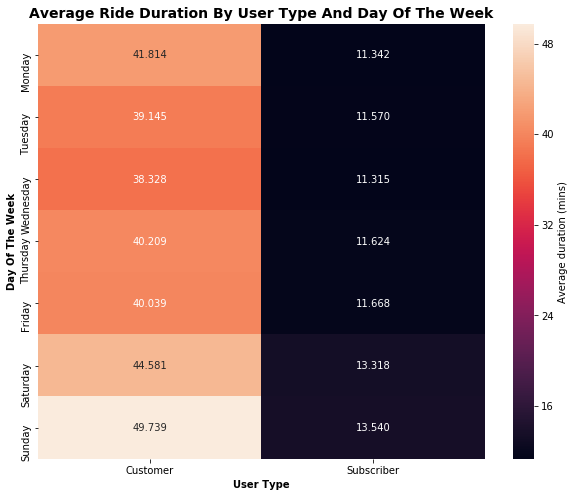

In [625]:
plt.figure(figsize = [10,8])

cat_means = bikedata.groupby(['user_type', 'weekday']).mean()['duration_mins']
cat_means = cat_means.reset_index(name = 'avg_duration_mins')
cat_means = cat_means.pivot(index = 'weekday', columns = 'user_type',
                            values = 'avg_duration_mins')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Average duration (mins)'})

# Add Labels
plt.title("Average ride duration by user type and day of the week".title(), fontsize = 14, weight = 'bold')
plt.xlabel('User Type'.title(), fontsize = 10, weight = 'bold')
plt.ylabel('Day of the week'.title(), fontsize = 10, weight = 'bold');

### Summary

> 1. Based on the above plots we can establish that average trip duration and number of rides vary by cutomer type and their usage. Subscriber have more trips and tend to have shorter duration of the trip. They also use rides mostly on weekdays. Weekdays are typically working days and subscribers may be mostly using the bikes for commuting. Hence these trips tend to be shorted in duration.
> 2. Customers have less trips than subscribers but they ride mostly on weekends. Average trip duration for these users is also high compared to subscribers. This is different pattern of consumption of bike ridership than subscribers. Customers may be using the bikes to explore the city and these activities late longer time.

